In [55]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D

print(tf.__version__)

2.0.0-rc0


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
data.shape

(984, 31)

In [33]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### First balance this data

In [36]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [37]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [38]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [39]:
# Now Both fraud and non-fraud dataframe have 492 rows and 31 columns. Now we can combine both dataframe

In [40]:
data = fraud.append(non_fraud, ignore_index=True)
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,137936.0,1.836695,-0.251625,-1.982525,0.410745,0.249859,-0.875310,0.215601,-0.167573,0.496254,...,0.276999,0.668861,-0.153000,-0.551889,0.190334,-0.098542,-0.029229,-0.030359,105.00,0
980,97391.0,-1.810445,0.546576,1.909549,-0.708492,-0.437255,0.201755,-0.451934,0.651811,1.544181,...,-0.132310,-0.105698,-0.113118,-0.455944,0.292007,0.580596,-0.073681,-0.029646,39.00,0
981,57347.0,1.452228,-1.182379,0.036118,-1.148955,-1.527226,-1.072033,-0.742634,-0.227477,-1.563199,...,-0.204861,-0.242970,-0.099697,0.363215,0.606368,-0.062863,-0.002324,0.012658,53.89,0
982,142420.0,-0.000078,0.852461,0.301968,-0.578939,0.533358,-1.133809,1.029741,-0.245652,-0.155618,...,-0.246473,-0.515201,0.075315,0.034649,-0.457478,0.136676,0.249229,0.100283,5.36,0


In [41]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [42]:
x = data.drop('Class', axis=1)
y = data['Class']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
y_train = y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [58]:
y_test = y_test.to_numpy()

In [59]:
y_train = y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [60]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [61]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

## Build CNN

In [65]:
epoch = 20
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
          

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [67]:
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
787/787 [==============================] - 2s 3ms/sample - loss: 0.7725 - accuracy: 0.6785 - val_loss: 0.6063 - val_accuracy: 0.8629
Epoch 2/50
787/787 [==============================] - 0s 262us/sample - loss: 0.4799 - accuracy: 0.8069 - val_loss: 0.5626 - val_accuracy: 0.9086
Epoch 3/50
787/787 [==============================] - 0s 214us/sample - loss: 0.4250 - accuracy: 0.8335 - val_loss: 0.5282 - val_accuracy: 0.9137
Epoch 4/50
787/787 [==============================] - 0s 209us/sample - loss: 0.3423 - accuracy: 0.8602 - val_loss: 0.4928 - val_accuracy: 0.9086
Epoch 5/50
787/787 [==============================] - 0s 208us/sample - loss: 0.3211 - accuracy: 0.8780 - val_loss: 0.4637 - val_accuracy: 0.8680
Epoch 6/50
787/787 [==============================] - 0s 193us/sample - loss: 0.3073 - accuracy: 0.8895 - val_loss: 0.4291 - val_acc

787/787 [==============================] - 0s 205us/sample - loss: 0.1365 - accuracy: 0.9504 - val_loss: 0.1904 - val_accuracy: 0.9340
Epoch 50/50
787/787 [==============================] - 0s 200us/sample - loss: 0.1397 - accuracy: 0.9517 - val_loss: 0.1901 - val_accuracy: 0.9340


In [76]:
def plot_learningCurve(history, epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Epoch')
    plt.legend(['Train','Test'], loc='upper_left')
    plt.show()

# plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Loss')
    plt.ylabel('Epoch')
    plt.legend(['Train','Val'], loc='upper_right')
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (50,)

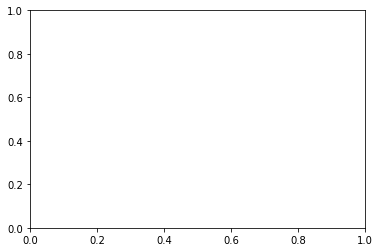

In [84]:
plot_learningCurve(history, 20)

In [82]:
# Our model is neither overfitting nor much underfitting

#### Adding Maxpool


Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 1s 2ms/sample - loss: 1.3754 - accuracy: 0.5197 - val_loss: 0.6648 - val_accuracy: 0.6548
Epoch 2/20
787/787 [==============================] - 0s 196us/sample - loss: 1.0702 - accuracy: 0.6086 - val_loss: 0.6393 - val_accuracy: 0.6396
Epoch 3/20
787/787 [==============================] - 0s 191us/sample - loss: 0.8342 - accuracy: 0.6734 - val_loss: 0.6197 - val_accuracy: 0.6294
Epoch 4/20
787/787 [==============================] - 0s 189us/sample - loss: 0.7940 - accuracy: 0.7039 - val_loss: 0.6038 - val_accuracy: 0.6294
Epoch 5/20
787/787 [==============================] - 0s 180us/sample - loss: 0.6282 - accuracy: 0.7586 - val_loss: 0.5874 - val_accuracy: 0.6447
Epoch 6/20
787/787 [==============================] - 0s 180us/sample - loss: 0.6096 - accuracy: 0.7687 - val_loss: 0.5718 - val_accuracy: 0.6497
Epoch 7/20
787/787 [==============================] - 0s 169us/sample - loss: 0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


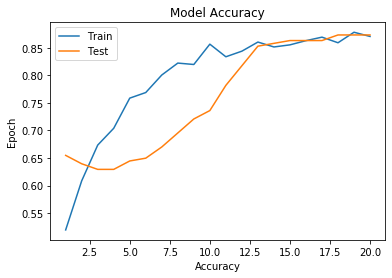

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


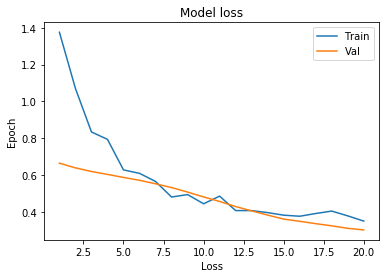

In [86]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test),verbose=1)
plot_learningCurve(history, epoch)

In [ ]:
# 